In [42]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [43]:
fraud_check=pd.read_csv('Fraud_check.csv')
fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [44]:
fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [45]:
label_encoder=preprocessing.LabelEncoder()
fraud_check['Undergrad']=label_encoder.fit_transform(fraud_check['Undergrad'])

In [46]:
fraud_check['Marital.Status']=label_encoder.fit_transform(fraud_check['Marital.Status'])

In [47]:
fraud_check['Urban']=label_encoder.fit_transform(fraud_check['Urban'])

In [48]:
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [49]:
fraud_check.duplicated(keep=False)

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Work.Experience', ylabel='Density'>

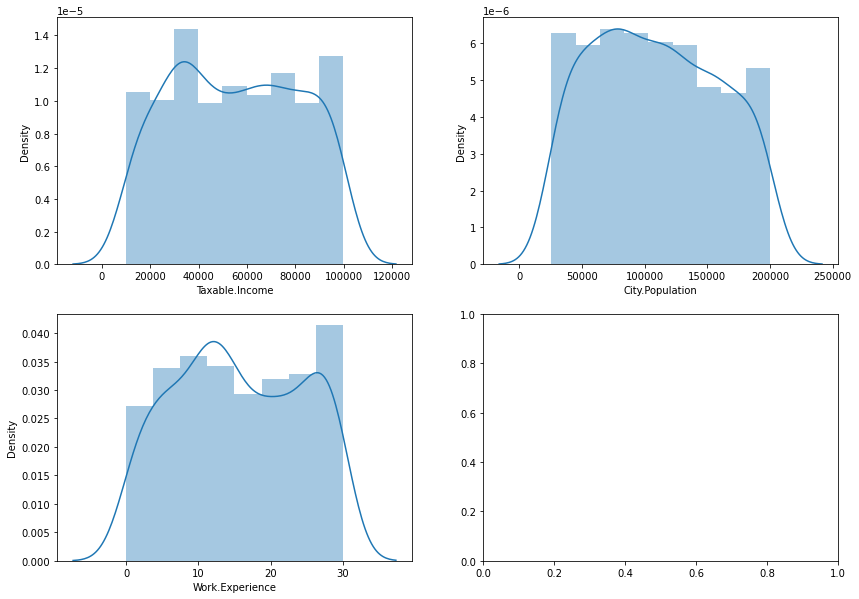

In [50]:
import seaborn as sns
fig,ax=plt.subplots(2,2 ,figsize=(14,10))
sns.distplot(fraud_check['Taxable.Income'], ax=ax[0,0])
sns.distplot(fraud_check['City.Population'],ax=ax[0,1])
sns.distplot(fraud_check['Work.Experience'],ax=ax[1,0])



In [52]:
fraud_check['Taxable.Income']=(fraud_check['Taxable.Income']>30000)*1

In [53]:
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


In [57]:
x=fraud_check.drop(axis=1, columns='Taxable.Income')
y=fraud_check['Taxable.Income']

In [58]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [59]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int32

In [60]:
x_train,x_test,y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=10)

In [63]:
train = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [64]:
train

DecisionTreeClassifier(max_depth=5)

In [71]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

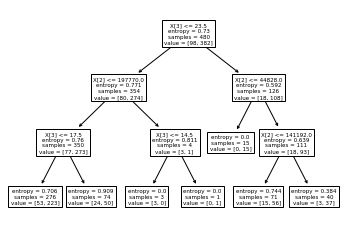

In [74]:
tree.plot_tree(model);

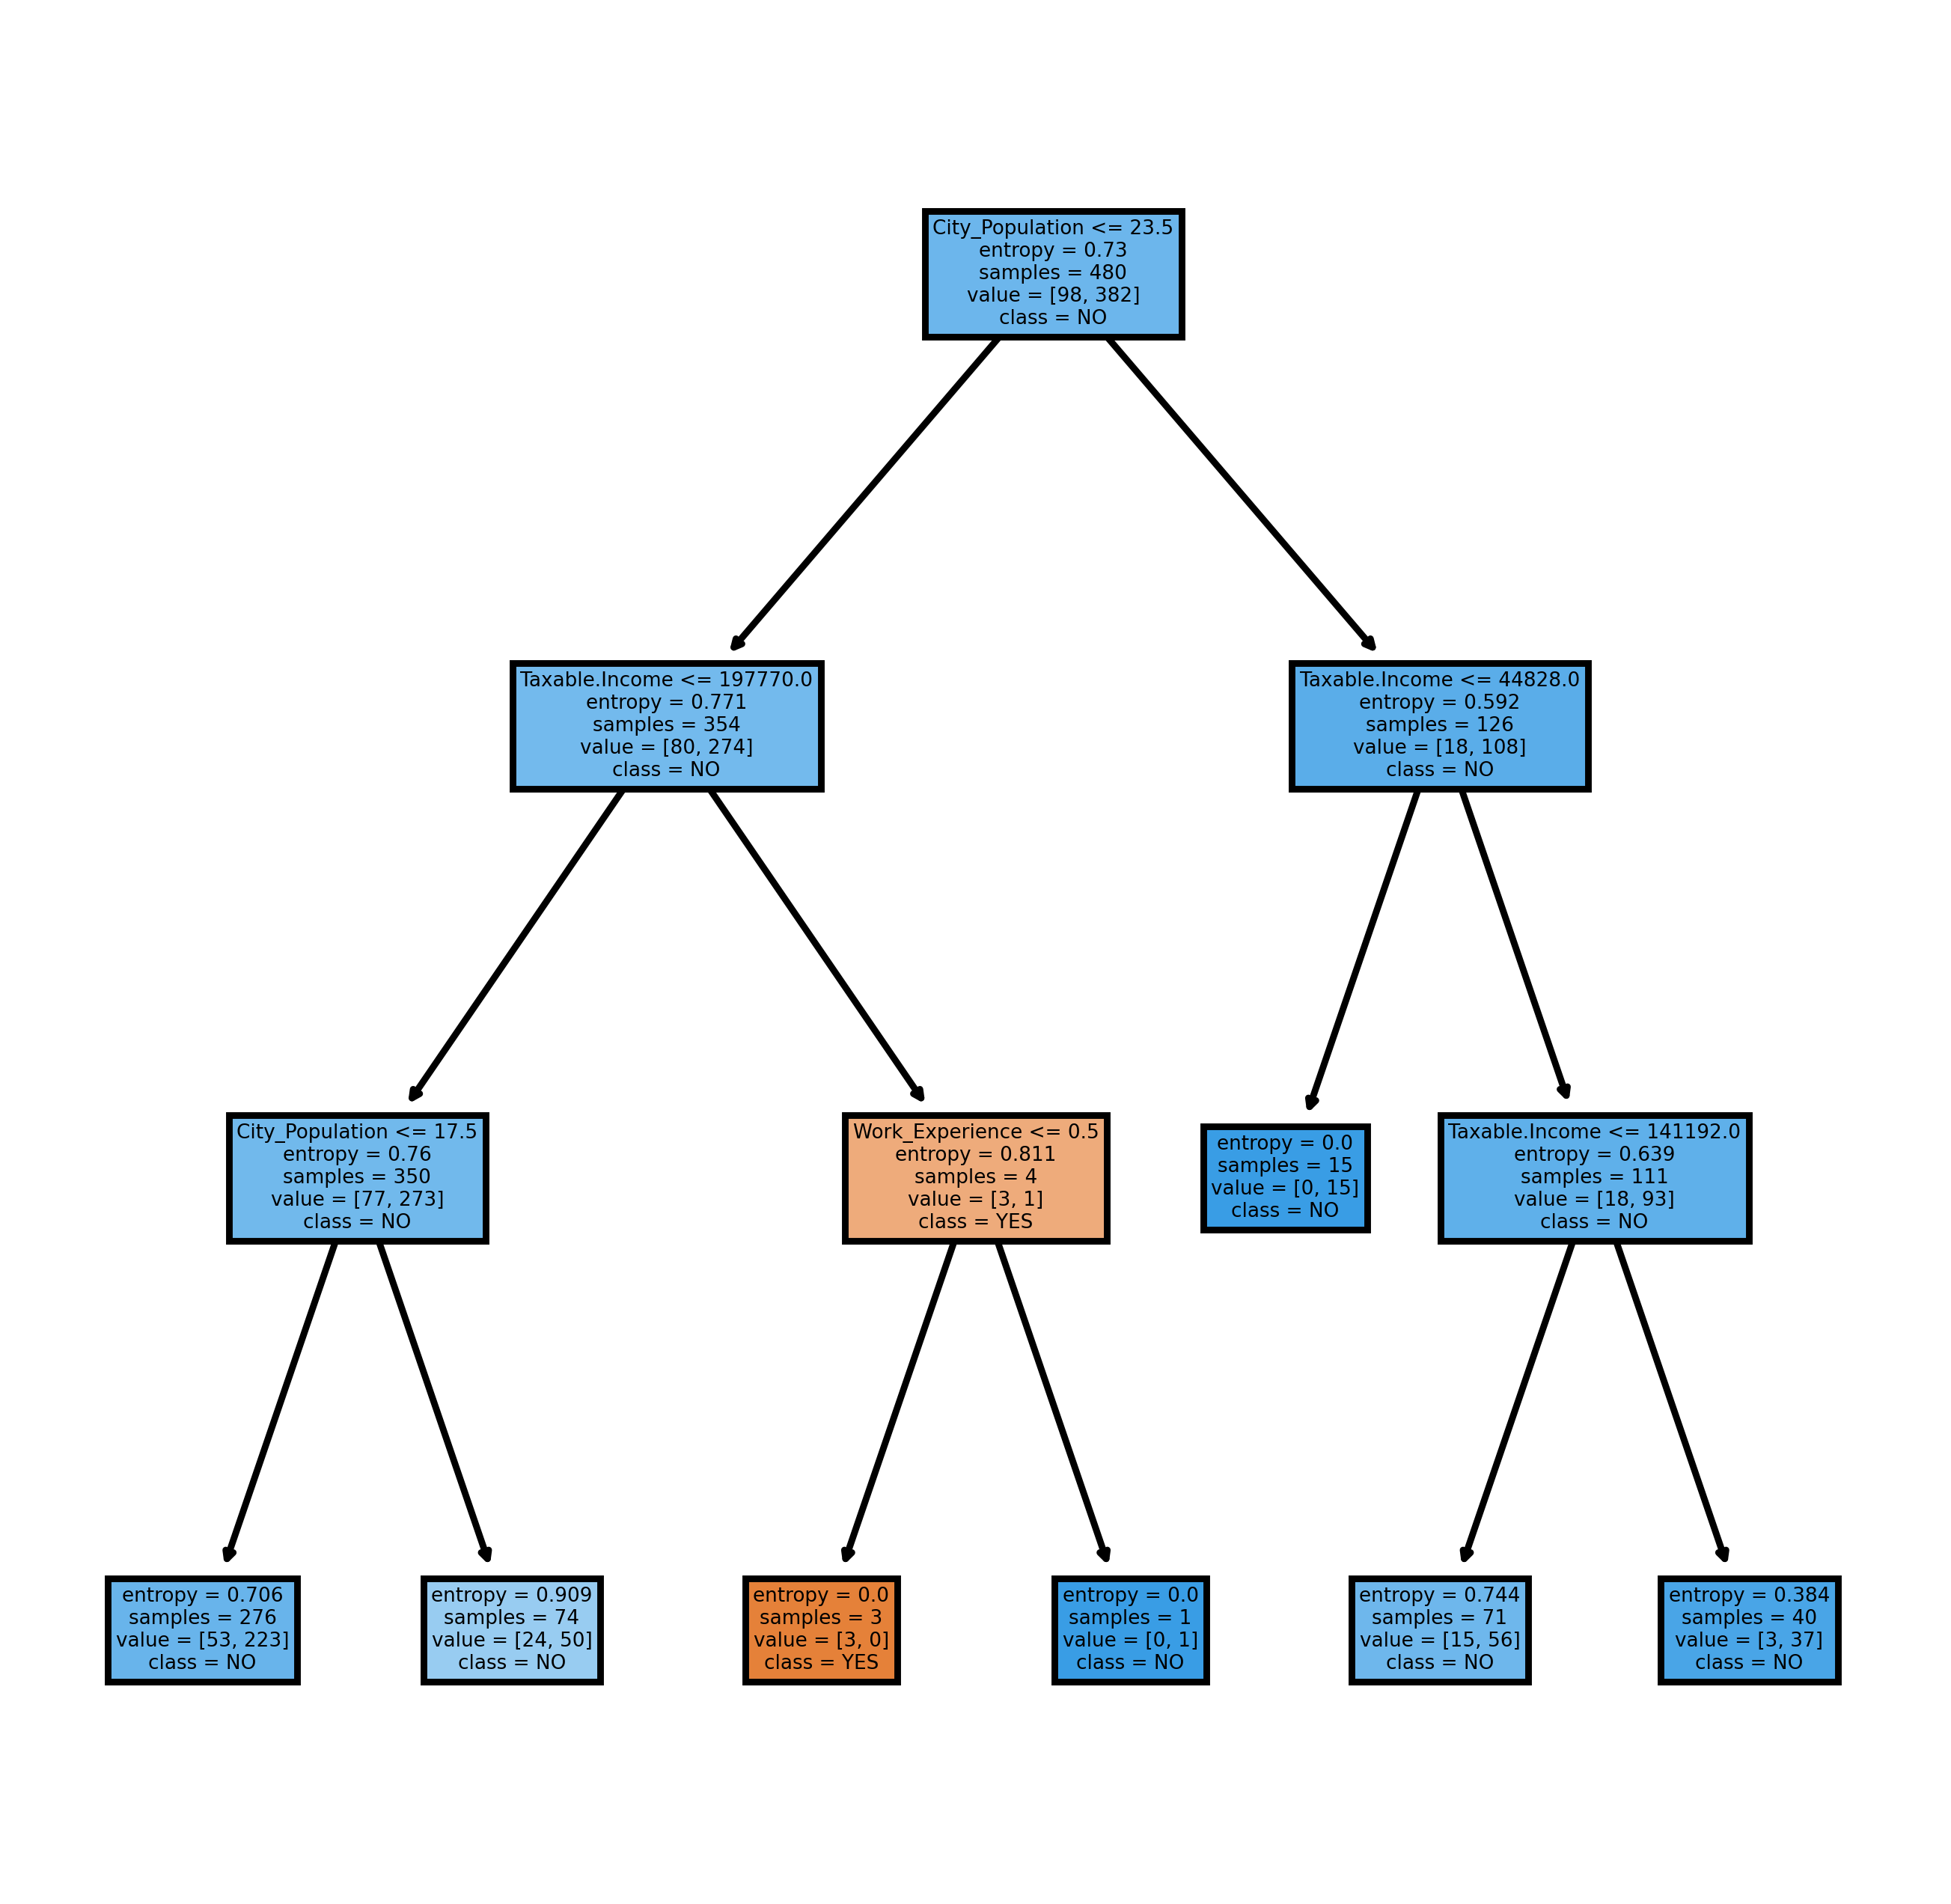

In [100]:
s=['Undergrad', 'Marital.Status', 'Taxable.Income', 'City_Population', 'Work_Experience']
d=['YES','NO']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=640)
tree.plot_tree(model, feature_names = s, class_names = d, filled=True);

In [101]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.8020833333333334

In [102]:
model.score(x_test, y_test)

0.775

model.feature_importances_

In [103]:
model.feature_importances_

array([0.       , 0.       , 0.4923802, 0.3474378, 0.160182 ])

In [104]:
y_pred=model.predict(x_test)

In [105]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [106]:
#check if the prediction is good or risky
model.predict_proba(x_test)

array([[0.21126761, 0.78873239],
       [0.19202899, 0.80797101],
       [0.19202899, 0.80797101],
       [0.32432432, 0.67567568],
       [0.19202899, 0.80797101],
       [0.32432432, 0.67567568],
       [0.19202899, 0.80797101],
       [1.        , 0.        ],
       [0.19202899, 0.80797101],
       [0.21126761, 0.78873239],
       [0.21126761, 0.78873239],
       [0.075     , 0.925     ],
       [0.19202899, 0.80797101],
       [0.32432432, 0.67567568],
       [0.19202899, 0.80797101],
       [0.19202899, 0.80797101],
       [0.32432432, 0.67567568],
       [0.19202899, 0.80797101],
       [0.32432432, 0.67567568],
       [0.19202899, 0.80797101],
       [0.21126761, 0.78873239],
       [0.19202899, 0.80797101],
       [0.21126761, 0.78873239],
       [0.075     , 0.925     ],
       [0.32432432, 0.67567568],
       [0.32432432, 0.67567568],
       [0.32432432, 0.67567568],
       [0.19202899, 0.80797101],
       [0.32432432, 0.67567568],
       [0.19202899, 0.80797101],
       [0.

In [108]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [109]:
cm

array([[ 0, 26],
       [ 1, 93]], dtype=int64)